# Présentation du dataset
Ce dataset provient de l'Open Access Series of Imaging Studies (OASIS), un projet visant à mettre à disposition gratuitement des ensembles de données IRM du cerveau à la communauté scientifique.

Le fichier csv `oasis_long` contient des données longitudinales organisées comme suit: 
- 150 patients adultes agés entre 60 et 96 ans
- Chaque patient a été examiné deux fois ou plus (*Chaque patient apparaît donc au moins deux fois dans le dataset*). 
- Tous les sujets sont droitiers
- Les sujets comprennent à la fois des hommes et des femmes 
- 72 patients ont été caractérisés comme non déments tout au long de l'étude. 
- 64 sujets ont été caractérisés comme déments au moment de leur visite initiale et le sont restés tout au long de l'étude. 
- 14 sujets ont été caractérisés comme non déments au moment de leur visite initiale et le sont devenus par la suite (*correspondent à la classe `converted` dans la colonne `Group`*).

> Des **données longitudinales** sont des données qui prennent en compte l'évolution des valeurs dans le temps, contrairement à la validation croisée qui est un cliché statistique à un instant T. C'est la raison pour laquelle chaque sujet de ce dataset apparaît plusieurs fois, plus précisment à chaque examen.

# Importation des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette('pastel')

# Exploration et arrangement des données

In [3]:
# Création du dataframe à partir du fichier csv
data = pd.read_csv('oasis_long.csv')

In [4]:
# Dimensions du dataset
# 373 lignes et 15 colonnes
data.shape

(373, 15)

In [5]:
# Affichage des 5 premières lignes
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Nous voyons que les sujets `OAS2_0001` et `OAS2_0002`, identifiés par la variable `Subject ID`, apparaîssent plusieurs fois.

In [6]:
# Informations sur les données sur dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [7]:
# Quantification des données manquantes
data.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Les données semblement relativement intègres, elles ne présentent que peu de données manquantes :
- 19 données manquantes pour la colonne SES
- 2 données manquantes pour la colonne MMSE

## Suppression de la colonne `Hand`
Du fait que tous les patients présents dans ce dataset soient droitiers, il n'est pas pertinent de garder cette colonne. Nous allons donc la supprimer. 

In [8]:
# Supression de la colonne 'Hand'
data = data.drop(['Hand'], axis=1)

## Renommage des colonnes

Pour des raisons de commodité nous allons renommer les colonnes afin de pouvoir y faire référence plus facilement par la suite.

In [9]:
data.rename(columns= {"Subject ID" : "subject_id",
                      "MRI ID" : "MRI_id",
                      "Group" : "group",
                      "Visit" : "visit",
                      "MR Delay" : "MR_delay",
                      "M/F" : "genre",
                      "Age" : "age",
                      "EDUC" : "educ"},
            inplace = True)

In [10]:
data.columns

Index(['subject_id', 'MRI_id', 'group', 'visit', 'MR_delay', 'genre', 'age',
       'educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

## Explication des colonnes

Source : https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal

- **subject_id** : Identifiant unique du sujet

- **MRI_id** : Identifiant unique de l'imagerie IRM (référence liée à l'ID du sujet)

- **group** : Démence du sujet
  - Demented : Dément
  - Nondemented : Non dément
  - Converted : Devenu dément durant le suivi

- **visit** : Nombre de visites effectués par le sujet

- **MR_delay** : Nombre de jours depuis la première visite

- **genre** : Sexe du patient
  - F = Female
  - M = Male

- **age** : Age du sujet

- **educ** : Années d'étude

- **SES** : SocioEconomic Status score
  - 1 : Très haut
  - 2 : Haut
  - 3 : Moyen
  - 4 : Bas
  - 5 : Très bas

- **MMSE** : (*Mini Mental State Examination*) évaluation rapide de l'état cognitif du patient
  - += 27 = Atteinte nulle
  - 21-26 = Atteinte légère
  - 11-20 = Atteinte modérée
  - <=10 = Atteinte sévère

- **CDR** : (*Clinical Dementia Rating*) évaluation des déficits cognitifs avec une perspective plus globales. Questionnaire sur 6 axes (mémoire, orientation, jugement, langage, activité vie quotidienne, vie quotidienne instrumentale)
  - 0 = Absence de trouble
  - 0.5 = Troubles incertaines
  - 1 = Troubles bénins
  - 2 = Troubles modérés
  - 3 = Troubles sévères

- **eTIV** : (*Estimated Total Intracranial Volume*) volume total du crâne qui contient le cerveau, le LCR et les méninges

- **nWBV** : (*Normalize Whole Brain Volume*) mesure qui permet de standardiser le volume total du cerveau d'un individu en le rapportant à une référence, généralement l'eTIV. En d'autres termes, le nWBV exprime le volume cérébral en rapport du volume total du crâne (eTIV)

- **ASF** : (*Atlas Scaling Factor*) facteur utilisé dans la recherche en neuroimagerie pour normaliser les mesures cérébrales entre les individus tout en tenant compte des différences de taille et de forme de la tête. Il garantit la cohérence des comparaisons et des analyses, en particulier dans les études sur la prédiction et la recherche concernant la maladie d'Alzheimer

# Création d'un nouveau dataset alternatif

Afin de faciliter certaines visualisations, nous allons créer un dataset alternatif composé de données croisées en non plus longitudinales, pour cela, nous n'allons garder que la dernière ligne de chaque sujet, correspondant à son dernier examen en date.

Pour cela nous allons procéder en trois étapes : 
- Tout d'abord nous filtreront le dataframe `data` par **ordre décroissant** des valeurs de la colonne `Visit` (*qui correspondent au nombre de visites effectuées par le patient*). Ainsi chaque première entrée d'un patient sera sa dernière visite en date.
- Ennsuite, nous utiliseront la fonction `drop_suplicates` sur la colonne `Subject ID` pour y supprimer tous les doublons : seuls les premières occurences seront gardées.
- Enfin, nous rétabliront l'ordre alphabétique sur la colonne `Subject ID`

> Nous nommeront ce nouveau dataset `data_u` pour souligner que chaque sujet y est **u**nique

In [11]:
# Classement par ordre décroissant des valeurs de 'Visit'
data_u = data.sort_values('visit', ascending=False)

# Suppression des doublons sur la colonne 'Subject ID'
data_u = data_u.drop_duplicates('subject_id')

# Retour à un classement alphabétiqu par 'Subject ID'
data_u = data_u.sort_values('subject_id')

In [12]:
data_u.head()

,subject_id,MRI_id,group,visit,MR_delay,genre,age,educ,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,85,12,4.0,30.0,0.0,1699,0.705,1.033
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,75,16,NaN,27.0,1.0,1372,0.710,1.279


Nous voyons que chaque sujet n'apparît plus qu'une seule fois, sa dernière visite comme référence.

In [13]:
data_u.shape

(150, 14)

Le dataset ne passe de 373 lignes à 150, pour chaque sujet unique.

# Visualisations

Nous allons diviser les visualisations en deux parties : 
- la première sera basée sur le dataset `data_u` composé de données croisées
- la deuxième sur le dataset `data` composé de données longitudinales

## Visualisations des données croisées

Visualisations exploitant le dataset `data_u` (données croisées)

### Age

In [14]:
data_u['age'].describe()

count    150.000000
mean      78.400000
std        7.668466
min       62.000000
25%       73.000000
50%       78.000000
75%       84.000000
max       98.000000
Name: age, dtype: float64

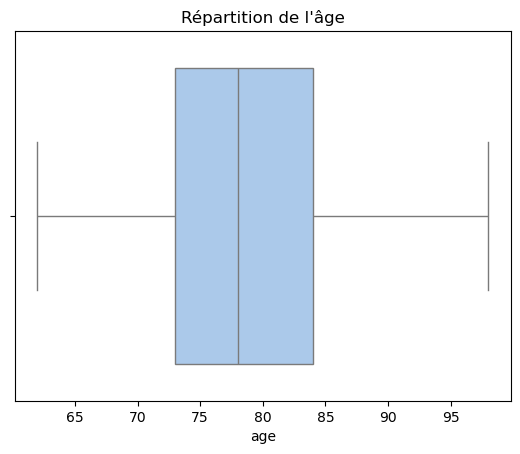

In [15]:
sns.boxplot(data=data_u, x='age')
plt.title("Répartition de l'âge")
plt.show()

Plusieurs informations nous parviennent sur l'âge des sujets de ce dataset :
- Les âges vont de 62 à 98 ans
- La moyenne d'âge est 78.4 ans
- L'écart type est de 7.66
- La médianne est à 78 ans
- Pas de valeurs abérrentes

Afin d'illustrer la répartition des âges, nous allons créer une nouvelle colonne classant l'âge du sujet selon des plages de valeurs déterminées.

Nous commençons par créer la fonction nous permettant de générer automatiquement le nom de nos classes.

In [16]:
def age_range(age : int) -> str:
    """ Fonction renvoyant le nom de la classe d'âge selon 
    la valeur du paramètre 'age' """
    if 60 <= age <= 65:
        return '60-65'
    elif 66 <= age <= 70:
        return '66-70'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 90:
        return '81-90'
    else:
        return '+90'

In [17]:
# Récupération de l'index de la colonne 'age'
age_index = data_u.columns.get_loc('age')

# Création de la nouvelle colonne
data_u.insert(age_index + 1, 'age_range', data_u['age'].apply(age_range))

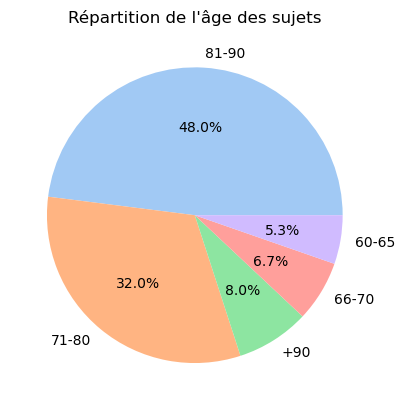

In [18]:
plt.pie(data_u['age_range'].value_counts(), labels=data_u['age_range'].unique(), autopct='%1.1f%%')
plt.title("Répartition de l'âge des sujets")
plt.show()

Observations :
- Les 81-90 ans représentent quasiment la moitié des sujets avec une représentation de 48%
- Vient ensuite les 71-80 ans avec 32%
- Les 71-90 ans représentent donc à eux seuls 80% des sujets
- Les 60-65 et les 66-70 représent à eux deux 12% des sujets avec respectivement 5.3% et 6.7%
- Les +90 ans représentent quant à eux 8% des sujets

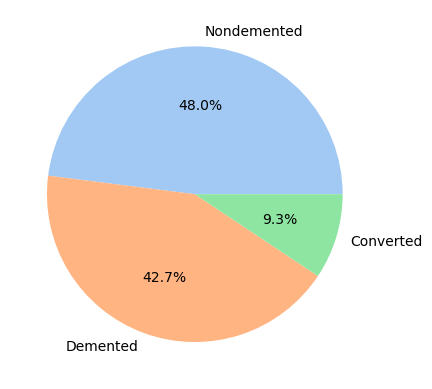

In [19]:
#sns.countplot(x='Group', data=data_u, order=data_u['Group'].value_counts().index)
plt.pie(data_u['group'].value_counts(), labels=data_u['group'].unique(), autopct='%1.1f%%')
plt.show()

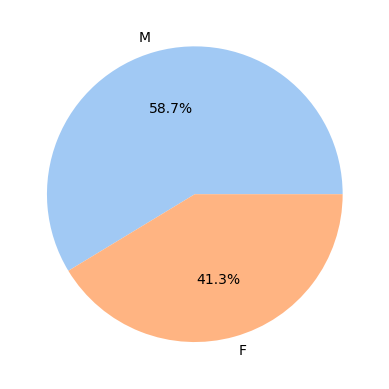

In [20]:
plt.pie(data_u['genre'].value_counts(), labels=data_u['genre'].unique(), autopct='%1.1f%%')
plt.show()

In [21]:
data_u

,subject_id,MRI_id,group,visit,MR_delay,genre,age,age_range,educ,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,81-90,14,2.0,30.0,0.0,2004,0.681,0.876
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,71-80,12,NaN,22.0,0.5,1698,0.701,1.034
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,90,81-90,18,3.0,27.0,0.0,1200,0.718,1.462
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,85,81-90,12,4.0,30.0,0.0,1699,0.705,1.033
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,75,71-80,16,NaN,27.0,1.0,1372,0.710,1.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,OAS2_0182,OAS2_0182_MR2,Demented,2,776,M,75,71-80,12,NaN,20.0,0.5,1654,0.696,1.061
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,72,71-80,13,2.0,30.0,0.0,1510,0.723,1.162
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,73,71-80,16,3.0,21.0,1.0,1351,0.708,1.299
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,81-90,16,1.0,26.0,0.5,1688,0.675,1.040


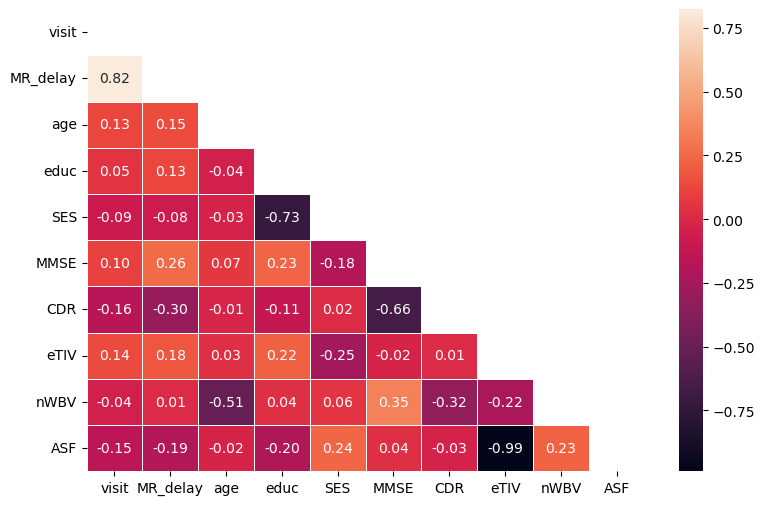

In [22]:
corr = data_u.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='rocket', mask=np.triu(corr))
plt.show()

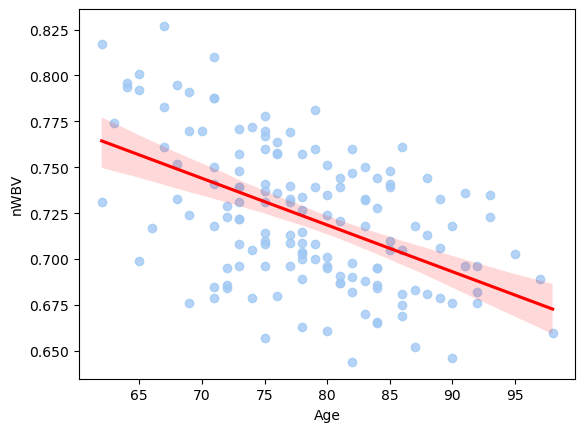

In [23]:
sns.regplot(x='age', y='nWBV', data=data_u, line_kws={'color' : 'red'})
plt.xlabel("Age")
plt.ylabel("nWBV")
plt.show()

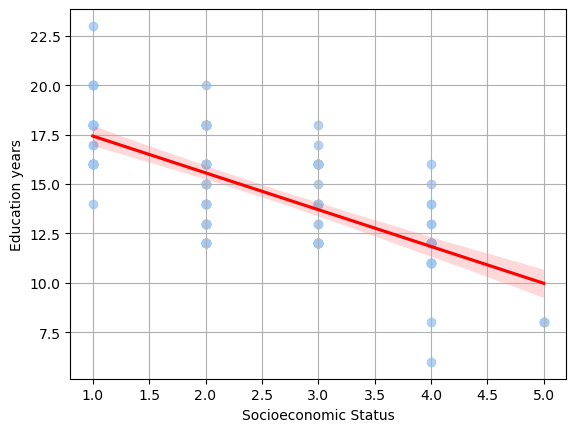

In [26]:
sns.regplot(x='SES', y='educ', data=data_u, line_kws={'color' : 'red'})
plt.xlabel("Socioeconomic Status")
plt.ylabel("Education years")
plt.grid(True)
plt.show()

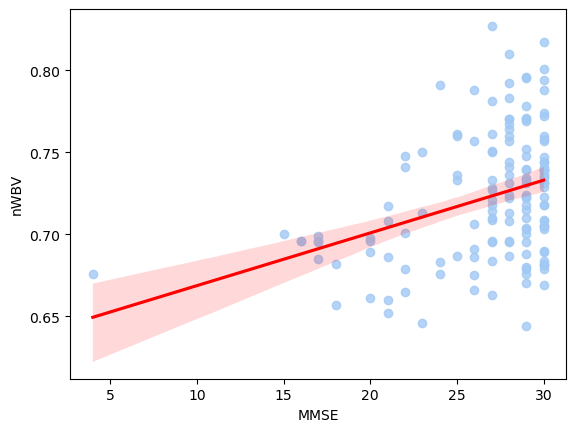

In [24]:
sns.regplot(x='MMSE', y='nWBV', data=data_u, line_kws={'color' : 'red'})
plt.xlabel("MMSE")
plt.ylabel("nWBV")
plt.show()